In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
epochs_ERDS = loading_from_listfolder(folder_selected,'epochs_ERDS_START')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

In [3]:
listOfInterest = ['MI_START']

In [4]:
epochs_ERDS[0].times

array([-2.        , -1.99804688, -1.99609375, ...,  5.99609375,
        5.99804688,  6.        ])

In [5]:
GA_power_events = dict()

baseline_event = {'MI_START':(-2,0),
'CUE_START_INHALE':(-2,0),
'CUE_START_EXHALE':(-2,0), 
'CUE_STOP_INHALE':(-7,-5),
'CUE_STOP_EXHALE':(-7,-5),
'MI_STOP':(-7,-5)}


for iEvent,event_type in enumerate(listOfInterest):
    print(event_type)
    for i,theseEpochs in enumerate(epochs_ERDS):
            print(i)
            power = compute_ERDS(theseEpochs[event_type],baseline_event[event_type])
            power_av = power.average()
            if i == 0:
                GA_power = power.copy()
                GA_power._data = np.expand_dims(power.average()._data,axis=0)
            else:
                GA_power._data = np.concatenate((GA_power._data,np.expand_dims(power.average()._data,axis=0)),axis=0)   
    GA_power_events.update({event_type:GA_power})

MI_START
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


# Spectrogram

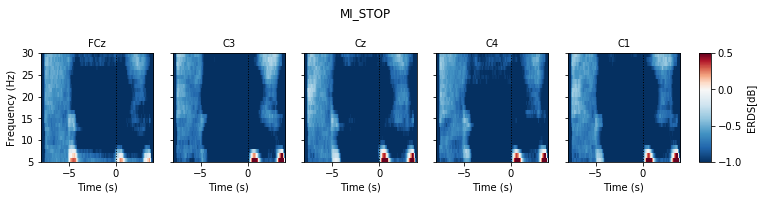

In [31]:
from visualization.plotting import compute_ERDS
path = os.path.join(folderGA,'ERDS_maps')
channelsOfInterest = ["FCz","C3","Cz","C4","C1"]
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
for iEvent,event_type in enumerate(epochs_ERDS[0].event_id):
    fig = plotting_ERDS(GA_power_events[event_type],channelsOfInterest,title=event_type,
                    cmap_use=my_cmap_r,scale = [-1,0.5], permutation = False) 
    saving_figure(event_type,path,fig)

# Topoplot mu band

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]


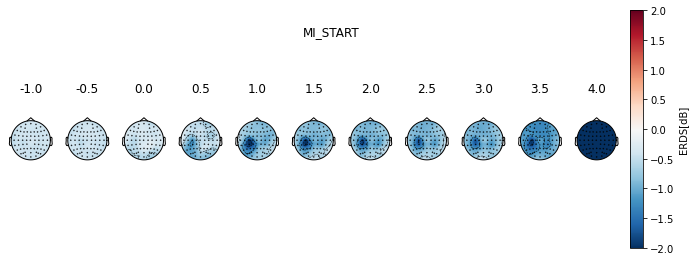

In [8]:
path = os.path.join(folderGA,'Topoplot_mu_band')
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
timeOfInterest = np.arange(-1,4.5,0.5)
print(timeOfInterest)
fmin,fmax = 8,12 
for iEvent,event_type in enumerate(epochs_ERDS[0].event_id):
    GA_power_av = GA_power_events[event_type].average()
    fig = plot_topoplot_over_time(GA_power_av,timeOfInterest,fmin,fmax,
                                  title=event_type,cmap_use=my_cmap_r,
                                  scale=[-2,2])
    saving_figure(event_type,path,fig)

# Topoplot beta band

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5]


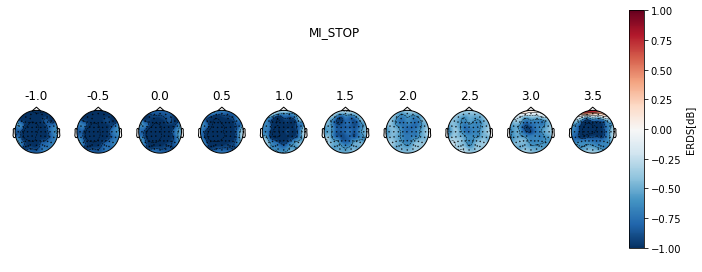

In [35]:
path = os.path.join(folderGA,'Topoplot_beta_band')
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
timeOfInterest = np.arange(-1,4,0.5)
print(timeOfInterest)
fmin,fmax = 23,25 
for iEvent,event_type in enumerate(epochs_ERDS[0].event_id):
    GA_power_av = GA_power_events[event_type].average()
    fig = plot_topoplot_over_time(GA_power_av,timeOfInterest,fmin,fmax,
                                  title=event_type,cmap_use=my_cmap_r,
                                  scale=[-1,1])
#     saving_figure(event_type,path,fig)

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]


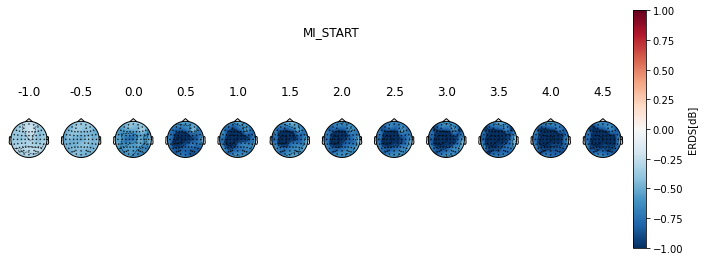

In [7]:
timeOfInterest = np.arange(-1,5,0.5)
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
print(timeOfInterest)
fmin,fmax = 23,25 
for iEvent,event_type in enumerate(epochs_ERDS[0].event_id):
    GA_power_av = GA_power_events[event_type].average()
    fig = plot_topoplot_over_time(GA_power_av,timeOfInterest,fmin,fmax,
                                  title=event_type,cmap_use=my_cmap_r,
                                  scale=[-1,1])

In [34]:
freq_range = GA_power_events[event_type].freqs
fmin,fmax =13,29
fmin_index = np.where(freq_range == fmin)[0][0]
fmax_index = np.where(freq_range == fmax)[0][0]
print(fmin_index,fmax_index)
GA_power_av = GA_power_events[event_type].average()

8 24


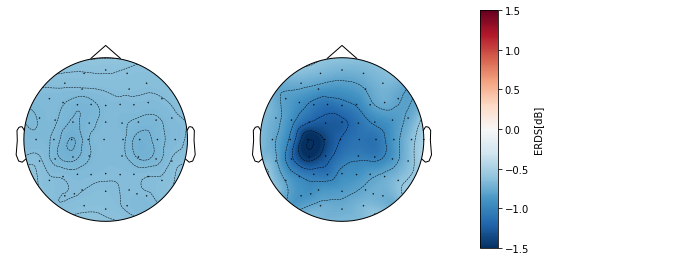

In [35]:
times = GA_power_events[event_type].times
info_chan = GA_power_events[event_type].info
tmin_mi,tmax_mi = 1,4
tmin_rest,tmax_rest = -2,0
tmin_mi = np.where(times == tmin_mi)[0][0]
tmax_mi = np.where(times == tmax_mi)[0][0]

tmin_rest = np.where(times == tmin_rest)[0][0]
tmax_rest = np.where(times == tmax_rest)[0][0]

scale = [-1.5,1.5]
fig, axes = plt.subplots(1, 3,figsize=(12, 4))

mu_band_rest = np.mean(np.mean(GA_power_av.data[:,fmin_index:fmax_index,tmin_rest:tmax_rest],axis=1),axis=1)
mne.viz.plot_topomap(mu_band_rest,info_chan,axes=axes[0], cmap=my_cmap_r,
                           vmin=scale[0], vmax=scale[1],show = False)

mu_band_mi = np.mean(np.mean(GA_power_av.data[:,fmin_index:fmax_index,tmin_mi:tmax_mi],axis=1),axis=1)
mne.viz.plot_topomap(mu_band_mi,info_chan,axes=axes[1], cmap=my_cmap_r,
                           vmin=scale[0], vmax=scale[1],show = False)
axes[-1].axis('off')
divider = make_axes_locatable(axes[-1])
cax = divider.append_axes('left', size='10%')
cb = fig.colorbar(axes[0].images[-1], cax=cax, pad=0.05)
cb.ax.set_ylabel('ERDS[dB]')


path = os.path.join(folderGA,'Topoplot_average')
saving_figure(event_type + 'Beta',path,fig)

[ 5  9 10 13 14 15 18 19 37 38 39 41 42 44 45]
(34, 61, 25, 2049)
(34, 2049)


(-5.0, 5.0)

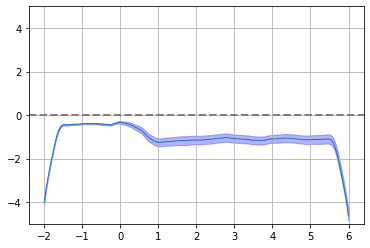

In [10]:

channelsOfInterest = ['Fz',\
                      'FCz','FC1','FC2','FC3', 'FC4',\
                     'Cz','C1', 'C2','C3', 'C4',\
                      'CP1', 'CP2','CP3', 'CP4']
# channelsOfInterest = ['FC3','C3','CP3']
nSubjects = np.shape(GA_power_events[event_type].data)[0]
chan_index = mne.pick_channels(epochs_ERDS[0].ch_names,channelsOfInterest)
print(chan_index) 
data_chan = GA_power_events[event_type].data
print(np.shape(data_chan))
data_av = np.mean(data_chan[:,chan_index,fmin_index:fmax_index,:],axis=2)
data_av = np.mean(data_av,axis=1)
print(np.shape(data_av))
mu = np.mean(data_av,axis=0)
sigma = np.std(data_av,axis=0)/np.sqrt(nSubjects)
times = GA_power_events[event_type].times
plt.plot(times, mu, linewidth=1)
plt.fill_between(times, mu - sigma, mu + sigma, color='b', alpha=0.3)
plt.axhline(0, linestyle='--', color='grey', linewidth=2)
plt.grid(True)
# plt.xlim(tmin, tmax)
plt.ylim(-5,5)
# plt.xlim(-2,4)

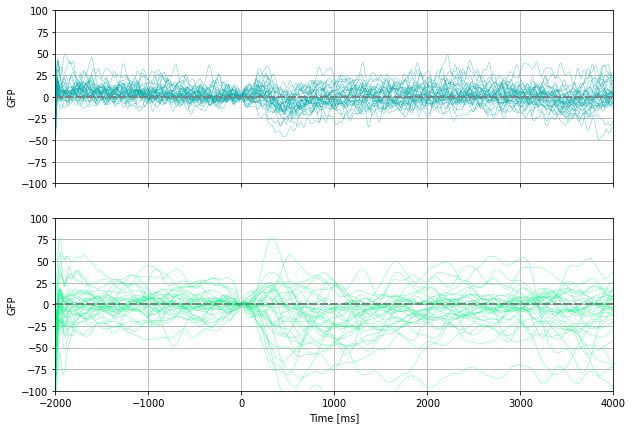

In [37]:
iter_freqs = [('Mu', 8, 12),
  ('Beta', 13, 30)]
nFreq = len(iter_freqs)
fig, axes = plt.subplots(nFreq, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 4))
tmin, tmax = -2., 4.
baseline = (-2,0)
for freq_subject in frequency_map_all:
    for ((freq_name, fmin, fmax), average), color, ax in zip(
        freq_subject, colors, axes.ravel()[::-1]):
        times = average.times * 1e3
        gfp = np.sum(average.data, axis=0)
        gfp = mne.baseline.rescale(gfp, times, baseline=(-2, 0))
        
        ax.plot(times, gfp, label=freq_name, color=color, linewidth=0.3)
        ax.axhline(0, linestyle='--', color='grey', linewidth=2)
        ax.grid(True)
        ax.set_ylabel('GFP')
        ax.set_xlim(tmin*1000, tmax*1000)
        axes.ravel()[-1].set_xlabel('Time [ms]') 
        ax.set_ylim(-1000,1000)
        ax.set_ylim(-100,100)

In [ ]:
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,stat_fun="mean")
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color='b')
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
            xy=(0.95, 0.8),
            horizontalalignment='right',
            xycoords='axes fraction')
    ax.set_xlim(tmin*1000, tmax*1000)
    axes.ravel()[-1].set_xlabel('Time [ms]') 